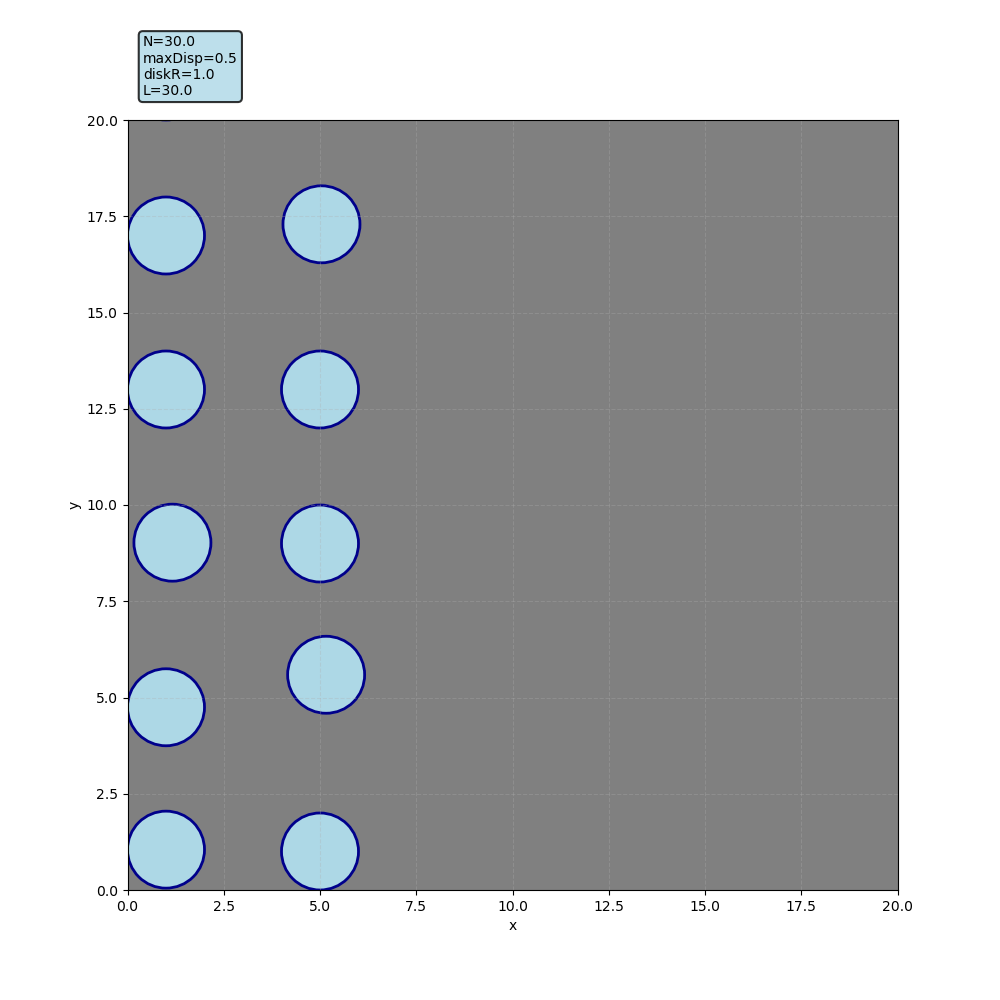

In [ ]:
%matplotlib widget

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import glob
from matplotlib.patches import Circle

# Get all configurations from the confs folder
files = glob.glob("confs/c*")
# sort them in ascending order
filenames = sorted(files, key=lambda x: int(x.split("/conf")[1]))

# Extract parameters from file for legend
params = {}
with open("params", "r") as f:
    for line in f:
        key, value = line.strip().split("=")
        params[key] = float(value)

# Create figure
fig, ax = plt.subplots(figsize=(10, 10))
ax.set(xlim=(0, params['L']), ylim=(0, params['L']), aspect='equal')
ax.set(xlabel="x", ylabel="y")
ax.set_facecolor('gray') 
fig.patch.set_facecolor('white') 
ax.grid(True, alpha=0.3, linestyle='--')

# Set up the title and parameter objects
title_text = ax.text(0.5, 1.05, '', transform=ax.transAxes, ha='center', fontsize=10,
                     bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.8, 
                     edgecolor='black', linewidth=1.5))

param_text = ax.text(0.02, 1.11, '', transform=ax.transAxes, va='top', fontsize=10, 
                     bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.8,
                     edgecolor='black', linewidth=1.5))

param_text.set_text(f"N={params['N']}\nmaxDisp={params['maxDisplacement']}\ndiskR={params['diskRadius']}\nL={params['L']}")

# List to hold the circle patches (assume number of circles remains constant)
circles = []

frame_data = []
for filename in filenames:
    data = np.loadtxt(filename, skiprows=2, usecols=[1,2,3])
    frame_data.append(data)
frame_data = np.array(frame_data, dtype=object)

# Initialize the first frame
data = np.loadtxt(filenames[0], skiprows=2, usecols=[1,2,3])
for x, y, r in data:
    circle = Circle((x, y), r, edgecolor='darkblue', facecolor='lightblue', linewidth=2)
    circles.append(circle)
    ax.add_patch(circle)

def update(frame):
    # Load new data for the frame
    data = frame_data[frame]
    
    # Extract last 5 characters of filename for title
    last_five = filenames[frame][-5:]
    title_text.set_text(f'Frame: {last_five}')
    
    # Update circle position and radius
    for patch, (x, y, r) in zip(circles, data):
        patch.center = (x, y)
        patch.set_radius(r)
    return circles

ani = FuncAnimation(fig, update, frames=len(filenames), blit=True)
plt.show()